Title SEction

Business Understanding

In [ ]:
Data Meanning Type

In [14]:
import pandas as pd 
import numpy as np
import plotly as py
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\linda\anaconda3\envs\ML_7331\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DATA QUALITY Loading & Checking the dataset

In [26]:
df = pd.read_csv('Encoded_Unbalanced_Visa_Data.csv')

df.head(2)


,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_NAME,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,...,EMPLOYER_STATE_CODE,AGENT_REPRESENTING_EMPLOYER_CODE,JOB_TITLE_CODE,WILLFUL_VIOLATOR_CODE,WORKSITE_CITY_CODE,WORKSITE_STATE_CODE,PW_UNIT_OF_PAY_CODE,PW_WAGE_LEVEL_CODE,WAGE_UNIT_OF_PAY_CODE,H1B_DEPENDENT_CODE
0,CERTIFIED,"HAPPY TAILS, INC",ANCHORAGE,AK,N,VETERINARY ASSISTANT,VETERINARY ASSISTANTS AND LABORATORY ANIMAL,1,1,0,...,1,0,73764,0,223,0,1,3,1,0
1,CERTIFIED,ANCHORAGE SCHOOL DISTRICT,ANCHORAGE,AK,Y,CLASSROOM MUSIC TEACHER K-6,"ELEMENTARY SCHOOL TEACHERS, EXCEPT SPECIAL",1,1,0,...,1,1,11288,0,223,0,4,0,4,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488395 entries, 0 to 488394
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CASE_STATUS                       488395 non-null  object 
 1   EMPLOYER_NAME                     488395 non-null  object 
 2   EMPLOYER_CITY                     488395 non-null  object 
 3   EMPLOYER_STATE                    488395 non-null  object 
 4   AGENT_REPRESENTING_EMPLOYER       488395 non-null  object 
 5   JOB_TITLE                         488395 non-null  object 
 6   SOC_NAME                          488395 non-null  object 
 7   TOTAL_WORKERS                     488395 non-null  int64  
 8   NEW_EMPLOYMENT                    488395 non-null  int64  
 9   CONTINUED_EMPLOYMENT              488395 non-null  int64  
 10  CHANGE_PREVIOUS_EMPLOYMENT        488395 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT         488395 non-null  i

In [27]:
df['ANNUALIZED_PREVAILING_WAGE'] = df['ANNUALIZED_PREVAILING_WAGE'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488395 entries, 0 to 488394
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CASE_STATUS                       488395 non-null  object 
 1   EMPLOYER_NAME                     488395 non-null  object 
 2   EMPLOYER_CITY                     488395 non-null  object 
 3   EMPLOYER_STATE                    488395 non-null  object 
 4   AGENT_REPRESENTING_EMPLOYER       488395 non-null  object 
 5   JOB_TITLE                         488395 non-null  object 
 6   SOC_NAME                          488395 non-null  object 
 7   TOTAL_WORKERS                     488395 non-null  int64  
 8   NEW_EMPLOYMENT                    488395 non-null  int64  
 9   CONTINUED_EMPLOYMENT              488395 non-null  int64  
 10  CHANGE_PREVIOUS_EMPLOYMENT        488395 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT         488395 non-null  i

SIMPLE STATISTICS

In [58]:
#Subset of count variables for summary statistics chart

dfssc = pd.DataFrame([df.TOTAL_WORKERS, df.NEW_EMPLOYMENT, df.CONTINUED_EMPLOYMENT, df.DAYS_PROCESS]).transpose()

dfssc.describe()

,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,DAYS_PROCESS
count,488395.000000,488395.000000,488395.000000,488395.000000
mean,1.957758,0.944901,0.309876,1059.206192
std,5.066188,3.889588,1.203975,144.520046
min,1.000000,0.000000,0.000000,-2558.000000
25%,1.000000,0.000000,0.000000,1094.000000
50%,1.000000,1.000000,0.000000,1095.000000
75%,1.000000,1.000000,0.000000,1095.000000
max,155.000000,150.000000,50.000000,1096.000000


In [66]:
#Subset of wage variables  for summary chart

dfssw = pd.DataFrame([df.ANNUALIZED_WAGE_RATE_OF_PAY, df.ANNUALIZED_PREVAILING_WAGE]).transpose()

dfssw.head(2)


,ANNUALIZED_WAGE_RATE_OF_PAY,ANNUALIZED_PREVAILING_WAGE
0,33883.00,29286.0
1,41804.62,41805.0


In [60]:
#confirm float format remained
dfssw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488395 entries, 0 to 488394
Data columns (total 2 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ANNUALIZED_WAGE_RATE_OF_PAY  488395 non-null  float64
 1   ANNUALIZED_PREVAILING_WAGE   488395 non-null  float64
dtypes: float64(2)
memory usage: 7.5 MB


In [71]:
# Removing zero values from prevailing wage to get more accurate results for the summary statistics 

dfssw =dfssw[dfssw['ANNUALIZED_PREVAILING_WAGE'] !=0]


In [73]:
dfssw.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ANNUALIZED_WAGE_RATE_OF_PAY,ANNUALIZED_PREVAILING_WAGE
count,488391,488391
mean,88963.2,76010.7
std,37849.6,26342.3
min,15000,15080
25%,65000,58739
50%,78835,70221
75%,103000,88234
max,1.688e+06,434200


In [ ]:
VISUALIZE ATTRIBUTES

In [ ]:
Engineered Fields

In [28]:
# CREATE column for certified, combines certified & certified-withdrawn = 1
df['CERTIFIED'] = np.where(df['CASE_STATUS']!='DENIED', 'Y','N')
check = df.get(['CASE_STATUS', 'CERTIFIED'])
check.head(5)

,CASE_STATUS,CERTIFIED
0,CERTIFIED,Y
1,CERTIFIED,Y
2,CERTIFIED-WITHDRAWN,Y
3,CERTIFIED,Y
4,CERTIFIED,Y


In [29]:
# insert column and calculate if wage rate is greater than or equal to prevailing wage
df['PAY_ABOVE_PREV_WAGE'] = np.where(df['ANNUALIZED_WAGE_RATE_OF_PAY']>=df['ANNUALIZED_PREVAILING_WAGE'], '1', '0')

pay_compare = df.get(['ANNUALIZED_WAGE_RATE_OF_PAY', 'ANNUALIZED_PREVAILING_WAGE', 'PAY_ABOVE_PREV_WAGE'])
pay_compare.head(5)

pay_compare_totals_df = df.groupby(['PW_WAGE_LEVEL', 'PAY_ABOVE_PREV_WAGE']).size().reset_index(name='counts')

print(pay_compare_totals_df)

  PW_WAGE_LEVEL PAY_ABOVE_PREV_WAGE  counts
0       Level I                   0     540
1       Level I                   1  208073
2      Level II                   0     281
3      Level II                   1  172378
4     Level III                   0     127
5     Level III                   1   64254
6      Level IV                   0      89
7      Level IV                   1   42653


In [ ]:
Overall Sumamry

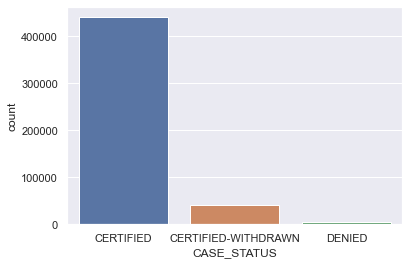

In [31]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="CASE_STATUS", data=df)

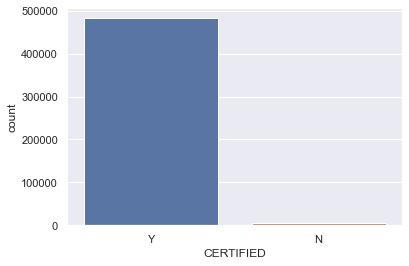

In [32]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="CERTIFIED", data=df)

In [30]:
# % of submissions by state - Top 10 shown

pd.DataFrame(df.EMPLOYER_STATE.value_counts(normalize = True)).head(10) * 100 

,EMPLOYER_STATE
CA,16.849681
TX,14.687087
NJ,12.511389
IL,6.759897
NY,6.461368
MI,4.569662
PA,4.075390
MA,3.753110
MD,3.446800
FL,3.104250


In [77]:
#WORKS FOR SUMMING TOTAL WORKERS
sum_df = df.groupby(by=['WORKSITE_STATE'])['TOTAL_WORKERS'].sum()
print(sum_df)

WORKSITE_STATE
AK       224
AL      2119
AR      3800
AZ     13394
CA    225891
CO     11814
CT     14225
DC      5468
DE      4649
FL     34013
GA     30401
IA      4031
ID      1267
IL     47012
IN      8929
KS      3550
KY      4236
LA      2493
MA     32577
MD     12238
ME       963
MI     24788
MN     15610
MO      9029
MS       827
MT       385
NC     25415
ND       558
NE      2509
NH      2475
NJ     57368
NM      1231
NV      1714
NY     71623
OH     23609
OK      2554
OR      8416
PA     44148
RI      2970
SC      4516
SD       523
TN      9746
TX     98591
UT      5517
VA     26373
VI        40
VT       668
WA     40986
WI      9759
WV       759
WY       158
Name: TOTAL_WORKERS, dtype: int64


Below charts are to get a feel for case status overall and by wage level

In [74]:
#Group by CASE_STATUS 
Case_Status_Totals_df = df.groupby(['CASE_STATUS']).size().reset_index(name='counts')
print(Case_Status_Totals_df)

           CASE_STATUS  counts
0            CERTIFIED  440499
1  CERTIFIED-WITHDRAWN   42100
2               DENIED    5796


In [75]:
#Group by WAGE_LEVEL AND CASE_STATUS 
Wage_Level_Status_Totals_df = df.groupby(['PW_WAGE_LEVEL', 'CASE_STATUS']).size().reset_index(name='counts')
print(Wage_Level_Status_Totals_df)

print("{}% were Denied".format(len(df[df['CASE_STATUS']=='DENIED'])/float(df.shape[0])*100))

   PW_WAGE_LEVEL          CASE_STATUS  counts
0        Level I            CERTIFIED  184913
1        Level I  CERTIFIED-WITHDRAWN   20882
2        Level I               DENIED    2818
3       Level II            CERTIFIED  158186
4       Level II  CERTIFIED-WITHDRAWN   12917
5       Level II               DENIED    1556
6      Level III            CERTIFIED   58934
7      Level III  CERTIFIED-WITHDRAWN    4648
8      Level III               DENIED     799
9       Level IV            CERTIFIED   38466
10      Level IV  CERTIFIED-WITHDRAWN    3653
11      Level IV               DENIED     623
1.1867443360394763% were Denied
